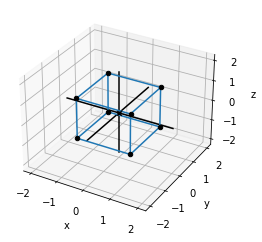

In [1]:
# Exercise 3.2 Mini Project
#
# There are exactly eight 3D vectors whose coordinates are all either +1 or –1.
# For instance, (1, –1, 1) is one of these. Plot all of these eight vectors as
# points. Then figure out how to connect them with line segments using Segment3D
# objects to form the outline of a cube.

from appendix.draw3d import *

vs = [1, -1]
points = [(x, y, z) for x in vs for y in vs for z in vs]

x_edges = [((-1, y, z), ((1, y, z))) for y in vs for z in vs]
y_edges = [((x, -1, z), ((x, 1, z))) for x in vs for z in vs]
z_edges = [((x, y, -1), ((x, y, 1))) for x in vs for y in vs]

edges = x_edges + y_edges + z_edges

draw3d(Points3D(*points), *[Segment3D(*edge) for edge in edges])


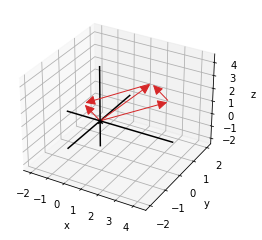

In [2]:
# Exercise 3.3
# 
# Draw (4, 0, 3) and (–1, 0, 1) as Arrow3D objects, such that they are placed
# tip-to-tail in both orders in 3D. What is their vector sum?

from appendix.draw3d import *
from vec import *

v1 = (4, 0, 3)
v2 = (-1, 0, 1)

s = add(v1, v2)

draw3d(
    Arrow3D(v1),
    Arrow3D(v2),
    Arrow3D(s, v1),
    Arrow3D(v2, s),
    Arrow3D(s)
)

In [3]:
# Exercise 3.4
#
# Suppose we set vectors1=[(1,2,3,4,5),(6,7,8,9,10)] and
# vectors2=[(1,2),(3,4),(5,6)]. Without evaluating in Python, what are the
# lengths of zip(*vectors1) and zip(*vectors2)?

vectors1 = [(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]
vectors2 = [(1, 2), (3, 4), (5, 6)]

assert(len(list(zip(*vectors1))), 5)
assert(len(list(zip(*vectors2))), 2)


<>:10: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:11: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:10: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:11: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/var/folders/zk/vmw322415kx9wn4f2l26xjcw0000gn/T/ipykernel_83161/2945362193.py:10: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(list(zip(*vectors1))), 5)
/var/folders/zk/vmw322415kx9wn4f2l26xjcw0000gn/T/ipykernel_83161/2945362193.py:11: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(len(list(zip(*vectors2))), 2)


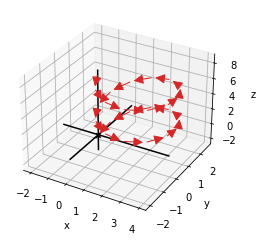

In [4]:
# Exercise 3.5 — Mini Project
#
# The following comprehension creates a list of 24
# Python vectors: vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0, 24)]
# What is the sum of the 24 vectors? Draw all 24 of them tip-to-tail as Arrow3D
# objects.

from math import sin, cos, pi

vs = [(sin(pi*t/6), cos(pi*t/6), 1.0/3) for t in range(0, 24)]

moving_sum = (0, 0, 0)
arrows = []

for vector in vs:
    next_sum = add(moving_sum, vector)
    arrows.append(Arrow3D(moving_sum, next_sum))
    moving_sum = next_sum

draw3d(*arrows)


In [5]:
# Exercise 3.6
#
# Write a function scale(scalar,vector) that returns the input scalar times the
# input vector. Specifically, write it so it works on 2D or 3D vectors, or
# vectors of any number of coordinates.

from vec import *

assert(scale(2, (2, 3, 4)) == (4, 6, 8))


In [6]:
# Exercise 3.7
#
# Let u = (1, –1, –1) and v = (0, 0, 2).
# What is the result of u + 1⁄2 · (v – u)?

from vec import *

u = (1, -1, -1)
v = (0, 0, 2)

# v - u =             (-1, 1, 3)
# 1/2 * (v - u) =     (-0.5, 0.5, 1.5)
# u + 1/2 * (v - u) = (0.5, -0.5, 0.5)

assert((add(u, scale(1/2, subtract(v, u)))) == (0.5, -0.5, 0.5))


In [7]:
# Exercise 3.8
#
# Try to find the answers for this exercise without using code and
# then check your work. What is the length of the 2D vector (1, 1)? What is the
# length of the 3D vector (1, 1, 1)? We haven’t yet talked about 4D vectors, but
# these have four coordinates instead of two or three. If you had to guess, what
# is the length of the 4D vector with coordinates (1, 1, 1, 1)?

from math import *
from vec import *

len_2 = length((1, 1))  # 1.414
len_3 = length((1, 1, 1))  # 1.732
len_4 = length((1, 1, 1, 1))  # 2

assert(isclose(len_2, 1.414, abs_tol=.001))
assert(isclose(len_3, 1.732, abs_tol=.001))
assert(isclose(len_4, 2, abs_tol=.001))


In [8]:
# Exercise 3.9 — Mini Project
#
# The coordinates 3, 4, 12 in any order create a vec-
# tor of length 13, a whole number. This is unusual because most numbers are not
# perfect squares, so the square root in the length formula typically returns an
# irrational number. Find a different triple of whole numbers that define
# coordinates of a vector with a whole number length.

def make_coords_with_length(x, y, z):
    coords = (x, y, z)

    return {
        'length': length(coords),
        'coords': coords
    }

all_coords_with_lengths = [make_coords_with_length(x, y, z)
    for x in range(100)
    for y in range(x, 100)
    for z in range(y, 100)]

whole_length_coords = list(filter(lambda v: v['length'].is_integer(), all_coords_with_lengths))

print(len(whole_length_coords))


1031


In [9]:
# Exercise 3.10
#
# Find a vector in the same direction as (–1, –1, 2) but which has
# length 1.

vec = (-1, -1, 2)

current_length = length(vec)
scale_factor = 1 / current_length
answer = scale(scale_factor, vec)

assert(length(answer) == 1)


In [10]:
# Exercise 3.12
# 
# What is the dot product of (–1, –1, 1) and (1, 2, 1)? Are these
# two 3D vectors separated by more than 90°, less than 90°, or exactly 90°?

from vec import dot

# result = (-1, -1, 1) * (1, 2, 1)
# result = -1 * 1 + -1 * 2 + 1 * 1
# result = -2

assert(dot((-1, -1, 1), (1, 2, 1)) == -2)

# Exercise 3.13 — Mini Project
 
For two 3D vectors u and v, the values of (2u) · v and u · (2v) are both equal
to 2(u · v). In this case, u · v = 18 and both (2u) · v and u · (2v) are 36,
twice the original result. Show that this works for any real number s, not just
2. In other words, show that for any s the values of (su) · v and u · (sv) are
both equal to s(u · v).

## Answer:

```
Let's assume u = (a, b, c) and v = (x, y, z).
Then have a following equations:

su * v = u * sv
(s*a, s*b, s*c) * (x, y, z) = (a, b, c) * (x*s, y*s, z*s)
(s*a*x, s*b*y, s*c*z) = (a*x*s, b*y*s, c*z*s)


Both sides of equation are equal since multiplication on real numbers is commutative.

Also s(u * v) = (su) * v because:
(s*a*x, s*b*y, s*c*z) = s * (a*x, b*y, c*z)

And s(u * v) = u * (sv) because:
(a*x*s, b*y*s, c*z*s) = s * (a*x, b*y, c*z)

```


# Exercise 3.14 — Mini Project

Explain algebraically why the dot product of a vector with itself is the
square of its length.

## Answer:

```
Given v = (a, b, c):

dot = v * v
dot = (a*a + b*b + c*c)
dot = (a**2 + b**2 + c**2)
dot = (a + b + c)**2

len = sqrt(a**2 + b**2 + c**2)
len_squared = (sqrt(a**2 + b**2 + c**2))**2
len_squared = (a**2 + b**2 + c**2)
len_squared = (a + b + c)**2

dot = len_squared
```

In [11]:
# Exercise 3.15 — Mini Project
#
# Find a vector u of length 3 and a vector v of length 7 such that u · v = 21.
# Find another pair of vectors u and v such that u · v = –21. Finally, find
# three more pairs of vectors of respective lengths 3 and 7 and show that all of
# their lengths lie between –21 and 21.

from random import *
from vec import to_cartesian

u_of_length_3 = (0, 3)
v_of_length_7 = (0, 7)

assert(dot(u_of_length_3, v_of_length_7) == 21.0)

u_of_length_3 = (0, -3)
v_of_length_7 = (0, 7)

assert(dot(u_of_length_3, v_of_length_7) == -21.0)


def random_vec_of_length(l):
    return (l, pi * 2 * random())


us = [to_cartesian(*random_vec_of_length(3)) for i in range(3)]
vs = [to_cartesian(*random_vec_of_length(7)) for i in range(3)]

assert(all([-21 < length(u) < 21 for u in us]))
assert(all([-21 < length(v) < 21 for v in vs]))


In [12]:
# Exercise 3.16
#
# Let u and v be vectors, with |u| = 3.61 and |v| = 1.44. If the
# angle between u and v is 101.3°, what is u · v?

u_len = 3.61
v_len = 1.44

# dot_value = u_len * v_len * cos(101.3)
dot_value = 3.61 * v_len * cos(101.3 * pi/180)

assert(isclose(dot_value, -1.018, abs_tol=0.001))

In [13]:
# Exercise 3.17 — Mini Project
#
# Find the angle between (3, 4) and (4, 3) by converting them to polar
# coordinates and taking the difference of the angles.

from vec import to_polar

v1 = (3, 4)
v2 = (4, 3)

v1p = to_polar(*v1)
v2p = to_polar(*v2)

angle = v1p[1] - v2p[1]

assert(isclose(angle, 0.283, abs_tol=0.001))


In [14]:
# Exercise 3.18
# 
# What is the angle between (1, 1, 1) and (–1, –1, 1) in degrees?

from math import acos

v1 = (1, 1, 1)
v2 = (-1, -1, 1)

angle = acos(dot(v1, v2) / (length(v1) * length(v2)))

assert(isclose(degrees(angle), 109.5, abs_tol=0.1))

# Exercise 3.19

Each of the following diagrams show three mutually perpendicular arrows
indicating positive x, y, and z directions. A 3D box is shown for perspective
with the back of the box colored gray. Which of the four diagrams is
compatible with the one we chose? That is, which shows the x-, y-, and z-axes
as we’ve drawn them, even if from a different perspective?

## Answer:

A and B.

# Exercise 3.20

If you held up three coordinate axes in front of a mirror, would the image in
the mirror have the same orientation or a different one?

## Answer:

No, x axis will be inverted.

# Exercise 3.21

In what direction does the result of (0, 0, 3) × (0, –2, 0) point?


## Answer:

Since cross product produces a vector, which is perpendicular to operand
vectors, looking on two given vectors, one can say that the resulting vector
will lie on an x axis.

# Exercise 3.22

What are the coordinates of the cross product of (1, –2, 1) and (–6, 12, –6)?

```
Having the formula u x v = (uyvz - uzvy, uzvx - uxvz,uxvy - uyvx)

(1, -2, 1) x (-6, 12, -6) =
(-2*-6 - 1*12, 1*-6 - 1*-6, 1*12 - -2*-6) =
(0, 0, 0)
```


# Exercise 3.23 — Mini Project

The area of a parallelogram is equal to the length of its base times its height
as shown here: Given that, explain why the formula |u| · |v| · sin(O) makes
sense.

```
|u| is the length of the first vector, so it's the first item
|v| is the second item

sin(0) is a factor, by which we should multiply (decrease) one item to have height.

For the rect, sin(0) will be equal to 1, so are will be equal to |u| * |v|.
```

# Exercise 3.24

What is the result of the cross product (1, 0, 1) × (–1, 0, 0)?

```
Having the formula u x v = (uy*vz - uz*vy, uz*vx - ux*vz, ux*vy - uy*vx)

(1, 0, 1) x (–1, 0, 0) =
(0*0 - 1*0, 1*-1 - 1*0, 1*0 - 0*-1) =
(0, -1, 0)
```

In [15]:
# Exercise 3.25
# 
# Use the Python cross function to compute (0, 0, 1) × v for a few
# different values of a second vector v. What is the z-coordinate of each
# result, and why?

from vec import cross

v1 = (0, 0, 1)

cross(v1, (3, 4, 0)) # (-4, 3, 0)
cross(v1, (0, 4, 5)) # (-4, 0, 0)
cross(v1, (3, 0, 5)) # (0, 3, 0)

# Answer:
# z axis of the resulting vector will always be equal to zero, because
# resulting vector is always perpendicular to it's operands
# and one of the operands (v1) lies on z-axis.

(0, 3, 0)

# Exercise 3.26 — Mini Project

Show algebraically that u × v is perpendicular to both u and v regardless of the coordinates of u and v.

```
Hint Show (u × v) · u and (u × v) · v by expanding these into coordinates.

Two vectors are perpendicular, if their dot product equals to 0.

So to check if resulting vector of cross product is perpendicular to v and u,
one has to show that both dot products of (u × v) · u and (u × v) · v equal to 0.

(u × v) · u =
(uy*vz - uz*vy, uz*vx - ux*vz, ux*vy - uy*vx) · (ux, uy, uz) =
(ux*(uy*vz - uz*vy) + uy*(uz*vx - ux*vz) + uz*(ux*vy - uy*vx)) =
ux*uy*vz - ux*uz*vy + uy*uz*vx - uy*ux*vz + uz*ux*vy - uz*uy*vx =
0 (because all components have been cancelled out)

The same will happen with (u × v) · v

```

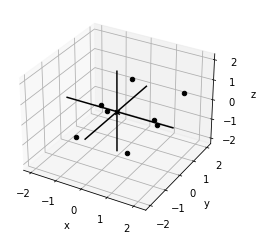

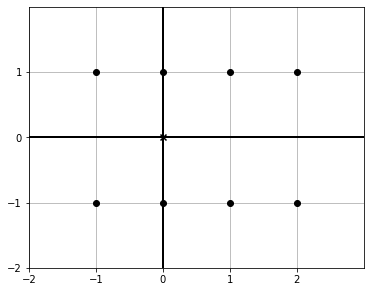

In [16]:
# trying to understand 3d to 2d projection

from appendix.draw2d import Points2D, draw2d

cube_verts = [
  # front side
  (-1, 1, -1),
  (1, 1, -1),
  (-1, -1, -1),
  (1, -1, -1),

  # back side
  (0, 1, 1),
  (2, 1, 1),
  (0, -1, 1),
  (2, -1, 1),
]

draw3d(Points3D(*cube_verts))

projected_cube_verts = ((x, y) for x, y, z in cube_verts)

draw2d(Points2D(*projected_cube_verts))


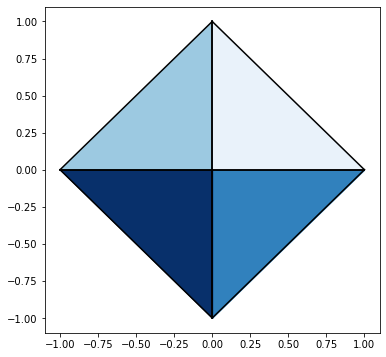

In [17]:
from appendix.draw3d import *
from appendix.draw2d import *

octahedron = [
    [(1, 0, 0), (0, 1, 0), (0, 0, 1)],
    [(1, 0, 0), (0, 0, -1), (0, 1, 0)],
    [(1, 0, 0), (0, 0, 1), (0, -1, 0)],
    [(1, 0, 0), (0, -1, 0), (0, 0, -1)],
    [(-1, 0, 0), (0, 0, 1), (0, 1, 0)],
    [(-1, 0, 0), (0, 1, 0), (0, 0, -1)],
    [(-1, 0, 0), (0, -1, 0), (0, 0, 1)],
    [(-1, 0, 0), (0, 0, -1), (0, -1, 0)],
]


def component(v, direction):
    return (dot(v, direction) / length(direction))


def vector_to_2d(v):
    return (component(v, (1, 0, 0)), component(v, (0, 1, 0)))



def face_to_2d(face):
    return [vector_to_2d(vertex) for vertex in face]


blues = matplotlib.cm.get_cmap('Blues')


def unit(v):
    return scale(1. / length(v), v)

def normal(face):
    return(cross(subtract(face[1], face[0]), subtract(face[2], face[0])))


def render(faces, light=(1,2,3), color_map=blues, lines=None):
    polygons = []

    for face in faces:
        unit_normal = unit(normal(face))

        if unit_normal[2] > 0:
            c = color_map(1 - dot(unit(normal(face)),
                          unit(light)))
            p = Polygon2D(*face_to_2d(face),
                                      fill=c, color=lines)
            polygons.append(p)

    draw2d(*polygons,axes=False, origin=False, grid=None)

render(octahedron, color_map=matplotlib.cm.get_cmap('Blues'), lines=black)


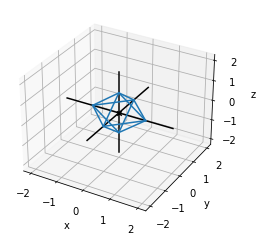

In [18]:
# Exercise 3.27 — Mini Project
#
# Find pairs of vectors defining each of the 12 edges
# of the octahedron and draw all of the edges in Python.

octahedron = [
    [(1, 0, 0), (0, 1, 0), (0, 0, 1)],
    [(1, 0, 0), (0, 0, -1), (0, 1, 0)],
    [(1, 0, 0), (0, 0, 1), (0, -1, 0)],
    [(1, 0, 0), (0, -1, 0), (0, 0, -1)],
    [(-1, 0, 0), (0, 0, 1), (0, 1, 0)],
    [(-1, 0, 0), (0, 1, 0), (0, 0, -1)],
    [(-1, 0, 0), (0, -1, 0), (0, 0, 1)],
    [(-1, 0, 0), (0, 0, -1), (0, -1, 0)],
]

top = (0, 0, 1)
bottom = (0, 0, -1)
xy_plane = [(0, 1, 0), (-1, 0, 0), (0, -1, 0), (1, 0, 0)]

edges = [
  *[Segment3D(top, p) for p in xy_plane],
  *[Segment3D(bottom, p) for p in xy_plane],
  *[Segment3D(xy_plane[i], xy_plane[(i+1)%4]) for i in range(0, 4)]
]

draw3d(*edges)